<a href="https://colab.research.google.com/github/kunal611/Probability_Statistics/blob/main/Probabilities_%26_Statistics_with_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descriptive statistics & Gaussian Distribution**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import geom,norm,binom
import math

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dravid.csv to dravid.csv
Saving sehwag.csv to sehwag.csv
Saving weight-height.csv to weight-height.csv


In [ ]:
sehwag = pd.read_csv("sehwag.csv")
dravid = pd.read_csv("dravid.csv")

In [ ]:
sehwag

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,15,21,15,2,0,100.00,2,caught,1,NaN,v Sri Lanka,Hambantota,24 Jul 2012,ODI # 3292
241,3,6,6,0,0,50.00,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),28 Jul 2012,ODI # 3293
242,34,46,29,6,0,117.24,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),31 Jul 2012,ODI # 3294
243,4,20,11,1,0,36.36,2,bowled,1,NaN,v Pakistan,Chennai,30 Dec 2012,ODI # 3314


In [ ]:
print(sehwag.shape,dravid.shape)

(245, 14) (318, 14)


In [ ]:
# percentile of Q1
p_25=np.percentile(sehwag["Runs"],25)
p_25

8.0

In [ ]:
# percentile of Q3
p_75=np.percentile(sehwag["Runs"],75)
p_75

46.0

In [ ]:
# Iqr calcualtion
iqr=p_75-p_25
iqr

38.0

In [ ]:
# Range
range1=(sehwag["Runs"].max()-sehwag["Runs"].min())
range1

219

In [ ]:
# Min & Max
print(sehwag["Runs"].min(),sehwag["Runs"].max())

0 219


In [ ]:
# Quantiles
sehwag["Runs"].quantile(.25)

8.0

In [ ]:
sehwag["Runs"].quantile(.5)

23.0

In [ ]:
sehwag["Runs"].quantile(.75)

46.0

In [ ]:
# lower whisker
lower= max(p_25-(1.5*iqr),sehwag["Runs"].min())
lower

0

In [ ]:
# upper whisker
upper= min(p_75+(1.5*iqr),sehwag["Runs"].max())
upper

103.0

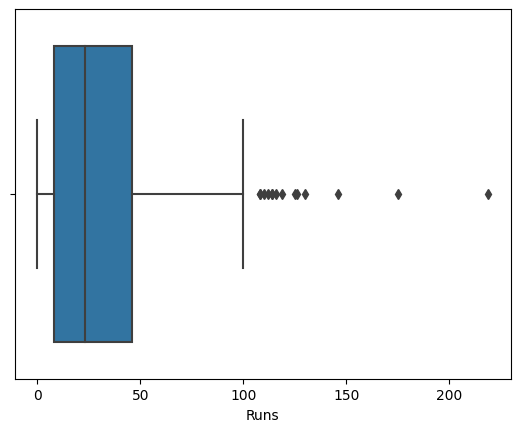

In [ ]:
# showing outliers in sehwag runs
sns.boxplot(x=sehwag["Runs"])
plt.show()

In [ ]:
sehwags_outlier= sehwag[sehwag["Runs"]>upper]
sehwags_outlier["Runs"].shape

(14,)

In [ ]:
sehwag.shape

(245, 14)

In [ ]:
14/245

0.05714285714285714

In [ ]:
describe_d=dravid["Runs"].describe()
describe_d

count    318.000000
mean      34.242138
std       29.681822
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      153.000000
Name: Runs, dtype: float64

In [ ]:
describe_d.loc["max"]

153.0

In [ ]:
d_25=dravid["Runs"].quantile(.25)
d_50=dravid["Runs"].quantile(.5)
d_75=dravid["Runs"].quantile(.75)
iqr_d=d_75-d_25
print(d_25,d_50,d_75,iqr_d)

10.0 26.0 54.0 44.0


In [ ]:
lower_d=max(d_25-(1.5*iqr_d),dravid["Runs"].min())
upper_d=min(d_75+(1.5*iqr_d),dravid["Runs"].max())
print(lower_d,upper_d)

0 120.0


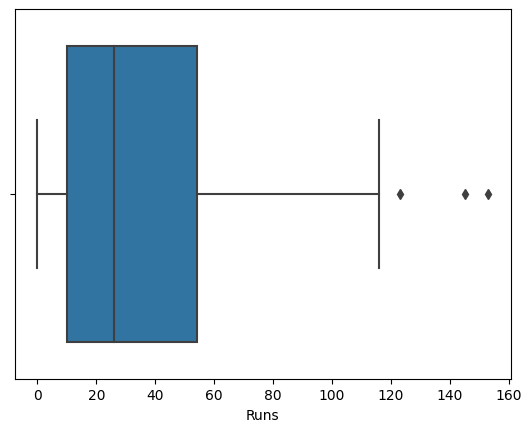

In [ ]:
sns.boxplot(x=dravid["Runs"])
plt.show()

In [ ]:
dravid_outlier= dravid[dravid["Runs"]>upper_d]
dravid_outlier["Runs"].shape

(3,)

In [ ]:
dravid.shape

(318, 14)

In [ ]:
4/318

0.012578616352201259

In [ ]:
df=pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

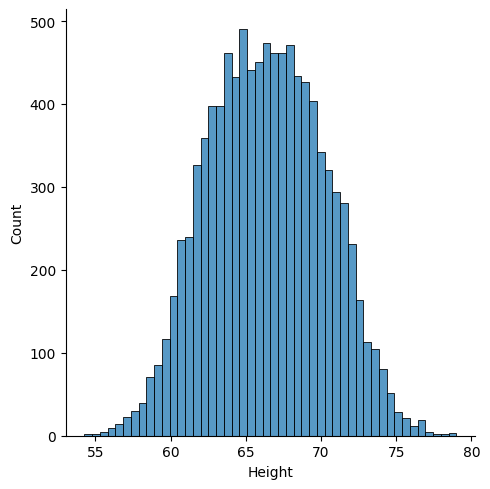

In [ ]:
sns.displot(df["Height"])
plt.show()

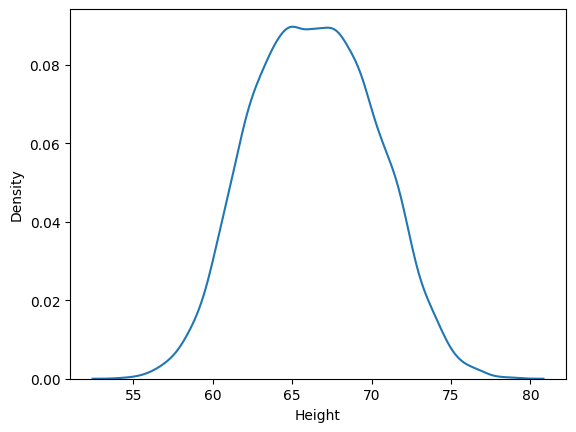

In [ ]:
sns.kdeplot(df["Height"])
plt.show()

In [ ]:
df["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [ ]:
e=ECDF(df["Height"])

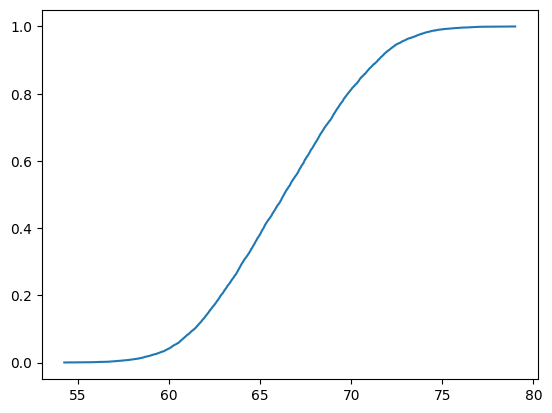

In [ ]:
plt.plot(e.x,e.y)
plt.show()

In [ ]:
min_height= df["Height"].min().round(2)
max_height= df["Height"].max().round(2)
print(min_height,max_height)

54.26 79.0


In [ ]:
df_height=df["Height"]
df_height.shape

(10000,)

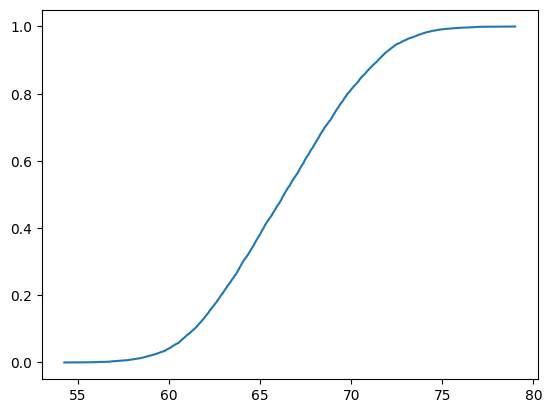

In [ ]:
x_values=np.linspace(min_height,max_height,1000)
y_values=[]
for x in x_values:
  people_shorter_than_x = df_height[df_height<=x]
  num_people_shorter_than_x= len(people_shorter_than_x)
  frac_people_shorter_than_x=num_people_shorter_than_x/df_height.shape[0]
  y_values.append(frac_people_shorter_than_x)
plt.plot(x_values,y_values)
plt.show()

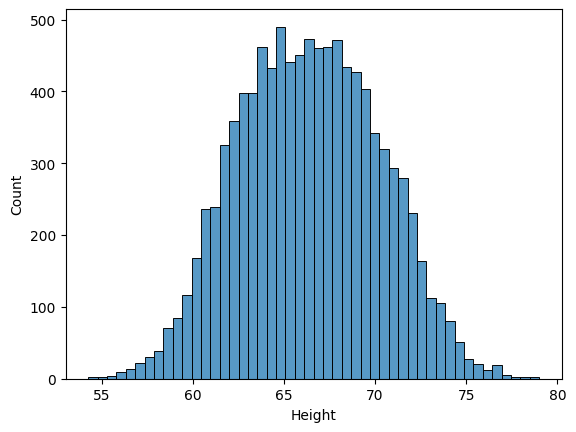

In [ ]:
sns.histplot(df["Height"])
plt.show()

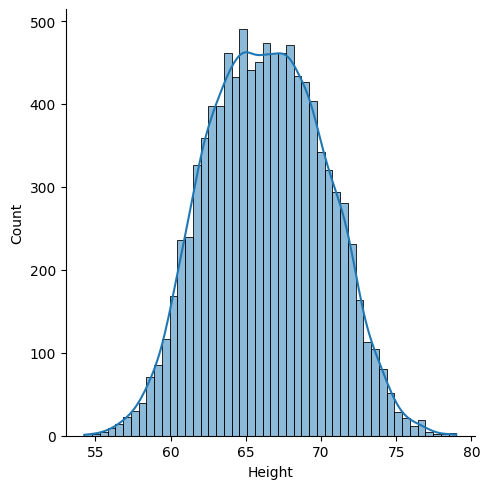

In [ ]:
sns.displot(df["Height"],kde=True)
plt.show()

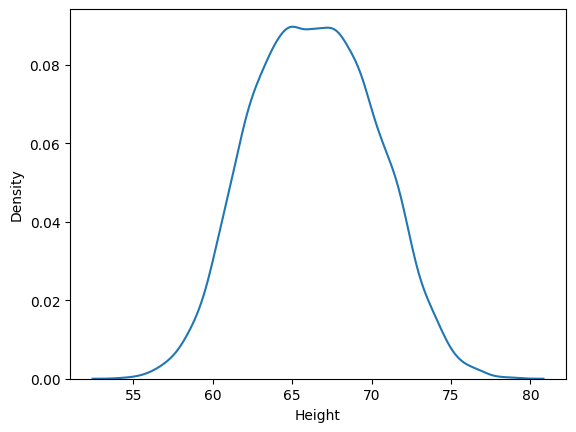

In [ ]:
sns.kdeplot(df["Height"])
plt.show()

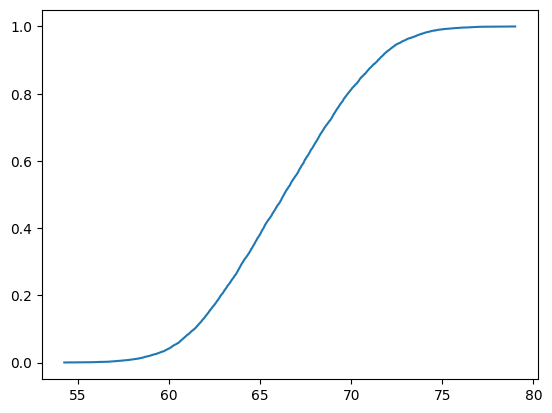

In [ ]:
plt.plot(e.x,e.y)
plt.show()

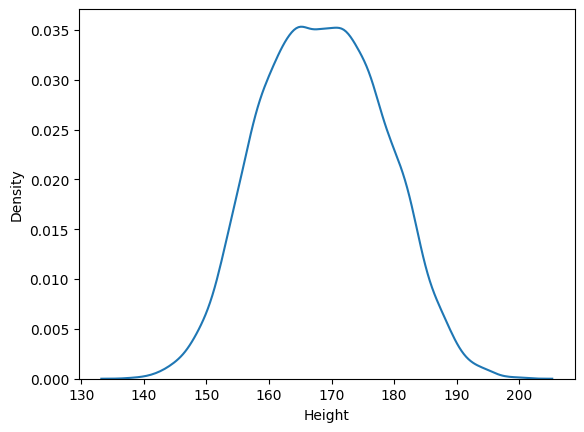

In [ ]:
sns.kdeplot(df["Height"]*2.54)
plt.show()

In [ ]:
z_score= (df["Height"]-df["Height"].mean())/df["Height"].std()
z_score

0       1.943964
1       0.627505
2       2.012343
3       1.393991
4       0.913375
          ...   
9995   -0.050658
9996    0.181830
9997   -0.649655
9998    0.693090
9999   -1.149651
Name: Height, Length: 10000, dtype: float64

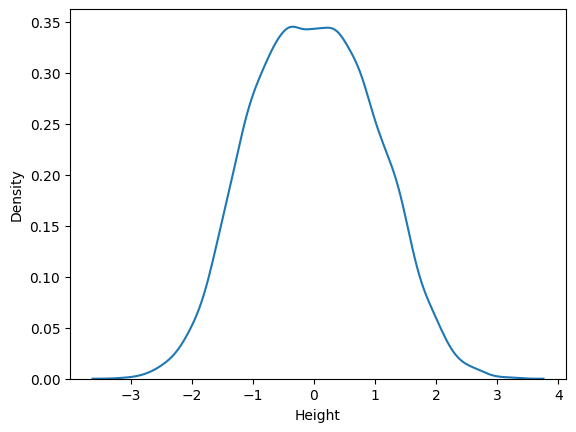

In [ ]:
sns.kdeplot(z_score)
plt.show()

In [ ]:
z_score1= ((df["Height"]*2.54)-(df["Height"]*2.54).mean())/(df["Height"]*2.54).std()
z_score1

0       1.943964
1       0.627505
2       2.012343
3       1.393991
4       0.913375
          ...   
9995   -0.050658
9996    0.181830
9997   -0.649655
9998    0.693090
9999   -1.149651
Name: Height, Length: 10000, dtype: float64

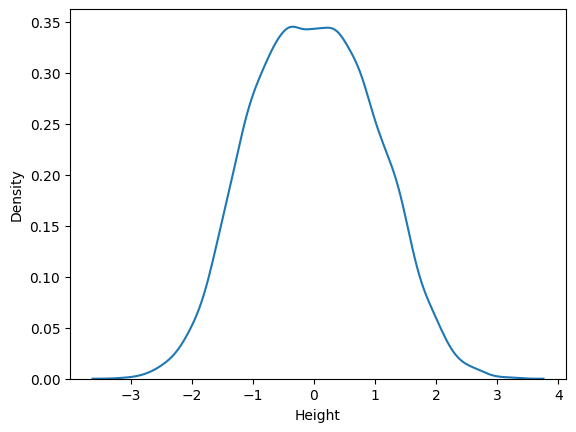

In [ ]:
sns.kdeplot(z_score1)
plt.show()

In [ ]:
description=df["Height"].describe()
description

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [ ]:
data_mean=description["mean"]
data_median=description["50%"]
data_std=description["std"]
print(data_mean, data_median, data_std)

66.36755975482124 66.31807008178464 3.8475281207732293


In [ ]:
norm.cdf(x=data_mean, loc=data_mean, scale=data_std)

0.5

In [ ]:
norm.cdf(x=data_median,loc=data_mean,scale=data_std)

0.49486865904934463

In [ ]:
norm.cdf(1)-norm.cdf(-1)

0.6826894921370859

In [ ]:
norm.cdf(2)-norm.cdf(-2)

0.9544997361036416

In [ ]:
norm.cdf(3)-norm.cdf(-3)

0.9973002039367398

In [ ]:
data_right_first_std=data_mean+data_std
data_right_first_std

70.21508787559448

In [ ]:
data_left_first_std=data_mean-data_std
data_left_first_std

62.52003163404802

In [ ]:
area_1_std_r=norm.cdf(x=data_right_first_std,
 loc=data_mean,scale=data_std)
area_1_std_r

0.8413447460685433

In [ ]:
area_1_std_l=norm.cdf(x=data_left_first_std,
 loc=data_mean,scale=data_std)
area_1_std_l

0.15865525393145719

In [ ]:
area_1_std_r-area_1_std_l

0.6826894921370861

In [ ]:
# Probality value at point 0.
norm.cdf(0)

0.5

In [ ]:
# Giving the value of the Z score as no. of times of std away from mean, it verifies from the norm.cdf(0)=0.5 from above
norm.ppf(0.5)

0.0

In [ ]:
# This means value till the first std
norm.cdf(1)

0.8413447460685429

In [ ]:
#This proves the value taken is 1 std away from mean in right side. value of Z score
norm.ppf(0.842)

1.0027116650265493

In [ ]:
# Suppose we want to calculate the area between two points say 62 to 77.5
norm.cdf(x=77.5, loc= data_mean, scale= data_std)-norm.cdf(x=62, loc= data_mean, scale= data_std)

0.8699403682372212

In [ ]:
# we check Z score with ppf function
norm.ppf(0.8699)

1.1259185424089588

In [ ]:
z_score=norm.ppf(0.95)
z_score

1.6448536269514722

In [ ]:
# zcore=(x-data_mean)/data_std
x=(z_score*data_std)+data_mean
x

72.69618033907287

In [ ]:
# 2.5 % area at left end
norm.cdf(x=46,loc=50,scale=2)

0.022750131948179195

In [ ]:
# 2.5 % area at right end
1-norm.cdf(x=54,loc=50,scale=2)

0.02275013194817921

In [ ]:
# Suppose we want to calculate the area between two points say 46 to 54 with mean 50 and std =2
norm.cdf(x=54,loc=50,scale=2)-norm.cdf(x=46,loc=50,scale=2)

0.9544997361036416

In [ ]:
norm.ppf(.69)

0.4958503473474532

In [ ]:
x=(0.4958503473474532*2)+50
x

50.991700694694906

In [ ]:
z_score=norm.ppf(.05)
z_score

-1.6448536269514729

 **Skaters take an average of 7.42 seconds and Standard Deviation
of 0.34 secs for 500m.
If I want to be faster than 95% of the people, what should be my
 speed?**

In [ ]:
z_score=norm.ppf(.05)
z_score

-1.6448536269514729

In [ ]:
x=(z_score*0.34)+7.42
x

6.860749766836499

In [ ]:
# (Distance/ time)= Speed
500/x

72.87833210546471

**A retail outlet sells around 1000 toothpaste per week. The Std. of
sales is 200.
If the on-hand inventory is around 1300. What is need of
replenishment?**

In [ ]:
1-norm.cdf(x=1300,loc=1000,scale=200)

0.06680720126885809

# **Central Limit Theorem**

In [ ]:
# Population
df=pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


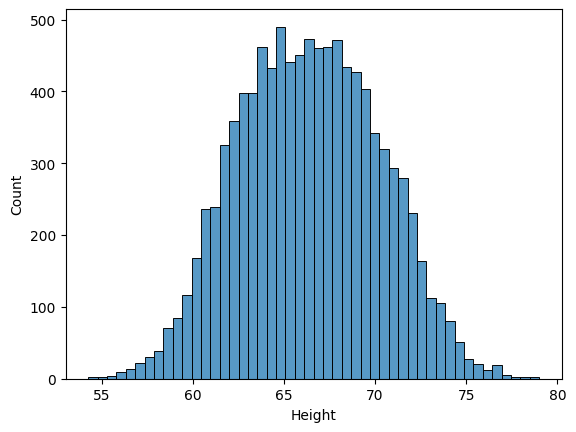

In [ ]:
sns.histplot(df["Height"])
plt.show()

In [ ]:
sigma=df["Height"].std()
sigma

3.8475281207732293

In [ ]:
mu=df["Height"].mean()
mu

66.36755975482124

In [ ]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

## Sample of 1

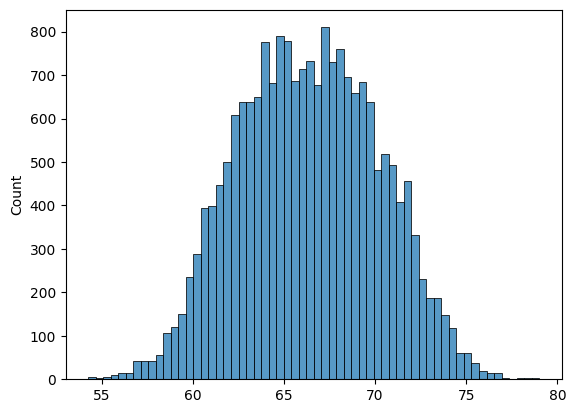

In [ ]:
sample_1=[np.mean(df["Height"].sample(1)) for i in range(20000)]
sns.histplot(sample_1)
plt.show()

In [ ]:
np.mean(sample_1)

66.34080789340963

In [ ]:
np.std(sample_1)

3.8298807746941956

In [ ]:
sigma/np.sqrt(1)

3.8475281207732293

## SAMPLE of 5

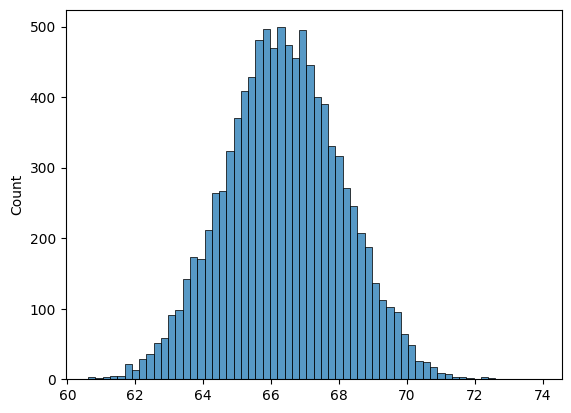

In [ ]:
sample_5=[np.mean(df["Height"].sample(5)) for i in range(10000)]
sns.histplot(sample_5)
plt.show()

In [ ]:
np.mean(sample_5)

66.36314444861505

In [ ]:
np.std(sample_5)

1.7199382639457406

In [ ]:
sigma/np.sqrt(5)

1.7206668846781923

## SAMPLE of 20

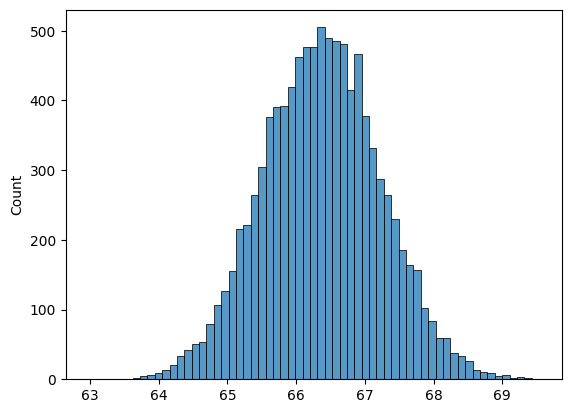

In [ ]:
sample_20=[np.mean(df["Height"].sample(20)) for i in range(10000)]
sns.histplot(sample_20)
plt.show()

In [ ]:
np.mean(sample_20)

66.36971890313133

In [ ]:
np.std(sample_20)

0.8570984726248987

In [ ]:
sigma/np.sqrt(20)

0.8603334423390961

### Q1. Blood Pressure Problem Statement
### Systolic blood pressure of a group of people is known to have an average of 122 mmHg and a standard deviation of 10 mmHg
### Calculate the probability that the average blood pressure of 16 people will be greater than 125 mmHg.

In [ ]:
1-norm.cdf(x=125,loc=122,scale=(10/np.sqrt(16)))

0.11506967022170822

In [ ]:
1-norm.cdf(3/2.5)

0.11506967022170822

In [ ]:
std_error=(10/np.sqrt(16))
std_error

2.5

### Q.2 Weekly toothpaste sales have a mean 1000 and std dev 200. What
### is the probability that the average weekly sales next month is
### more than 1110?

In [ ]:
1-norm.cdf(x=1110,loc=1000,scale=(200/np.sqrt(4)))

0.13566606094638267

In [ ]:
1-norm.cdf(110/100)

0.13566606094638267

### In an e-commerce website, the average purchase amount per
### customer is 80 with a standard deviation of 15. If we randomly
### select a sample of 50 customers, what is the probability that the
### average purchase amount in the sample will be less than $75?

In [ ]:
norm.cdf(x=75,loc=80,scale=(15/np.sqrt(50)))

0.009211062727049501

In [ ]:
norm.cdf((75-80)/(15/np.sqrt(50)))

0.009211062727049501

## Purchase time
### The average time taken for customers to complete a purchase is 4 minutes with a standard deviation of 1 minute. Find the probability that a randomly selected customer will complete a purchase within 6 minutes? Assume Gaussian

In [ ]:
norm.cdf(x=6,loc=4,scale=1)

0.9772498680518208

### What is the probability that the average time of the next 5 customers is less than 6 minutes?

In [ ]:
norm.cdf(x=6,loc=4,scale=(1/np.sqrt(5)))

0.9999961278917845

## Purchase Amount
### The average order value on an e-commerce website is 50, with a standard deviation of 5. What is the probability that a randomly selected order will have a value exceeding 60?

In [ ]:
1-norm.cdf(x=60,loc=50,scale=5)

0.02275013194817921

### What is the probability that the average of the next 3 orders exceeds $60?


In [ ]:
1-norm.cdf(x=60,loc=50,scale=(5/np.sqrt(3)))

0.00026600275256960515

## Body temperature
### Average body temperature has a mean of 98.6°F and a standard deviation of 0.5°F. What is the probability that a randomly chosen patient has a body temperature higher than 99.5°F?

In [ ]:
1-norm.cdf(x=99.5,loc=98.6,scale=0.5)

0.03593031911292488

# **Confidence Interval using CLT**

## Height example
### The mean height of a sample of 100 adults was found to be 65 inches, with a standard deviation of 2.5 inches.


In [ ]:
std_error= 2.5/np.sqrt(100)
std_error

0.25

In [ ]:
z1=norm.ppf(0.025)
z1

-1.9599639845400545

In [ ]:
z2=norm.ppf(0.975)
z2

1.959963984540054

In [ ]:
x1=65+(z1*std_error)
x1

64.51000900386498

In [ ]:
x2=65+(z2*std_error)
x2

65.48999099613502

In [ ]:
norm.interval(0.95,loc=65,scale=std_error)

(64.51000900386498, 65.48999099613502)

## Recovery days
### The sample mean recovery time of 100 patients after taking a drug was seen to be 10.5 days with a standard deviation of 2 days. Find the 95% confidence interval of the true mean

In [ ]:
norm.interval(0.95,loc=10.5,scale=(2/np.sqrt(100)))

(10.10800720309199, 10.89199279690801)

In [ ]:
std_error= 2/np.sqrt(100)
std_error

0.2

In [ ]:
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)

In [ ]:
x1=10.5+(z1*std_error)
x1

10.108007203091988

In [ ]:
x2=10.5+(z2*std_error)
x2

10.89199279690801

## Youtube watch hours
### The mean Youtube watch time of a sample of 100 students was found to be 3.5 hours, with a standard deviation of 1 hour. Construct a 90% confidence interval for the true watch time

In [ ]:
norm.interval(0.90, loc=3.5,scale=(1/np.sqrt(100)))

(3.3355146373048528, 3.6644853626951472)

# Confidence Interval using Bootstrap

In [ ]:
survey_1 = [35, 36, 33, 37, 34, 35]
np.mean(survey_1)

35.0

In [ ]:
survey_2 = [20, 37, 17, 50, 53, 33]
np.mean(survey_2)

35.0

In [ ]:
np.random.choice(survey_1,size=10)

array([35, 37, 36, 34, 35, 35, 35, 37, 33, 35])

In [ ]:
bootstrapped_sample=np.random.choice(survey_1,size=6)
np.mean(bootstrapped_sample)

34.666666666666664

In [ ]:
bootstrapped_sample_2=np.random.choice(survey_2,size=6)
np.mean(bootstrapped_sample_2)

40.5

In [ ]:
bootstrapped_sample_mean=[]
for i in range(10000):
 bootstrapped_sample=np.random.choice(survey_1,size=6)
 bootstrapped_sample_mean.append(np.mean(bootstrapped_sample))

<Axes: ylabel='Count'>

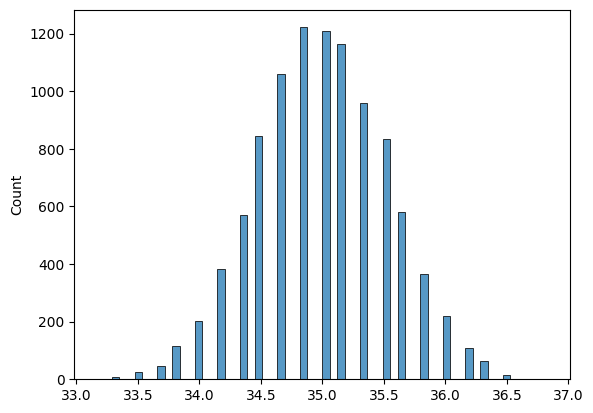

In [ ]:
sns.histplot(bootstrapped_sample_mean)

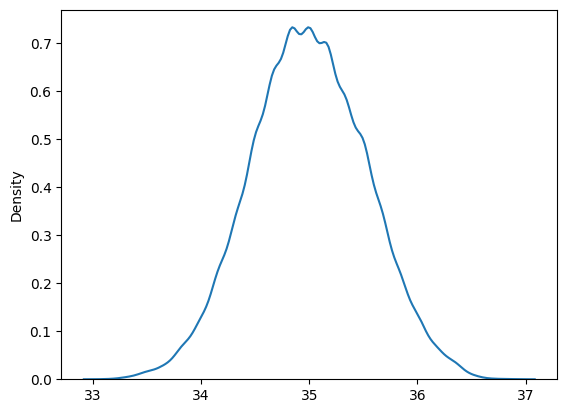

In [ ]:
sns.kdeplot(bootstrapped_sample_mean)
plt.show()

In [ ]:
bootstrapped_sample_mean_2=[]
for i in range(10000):
 bootstrapped_sample_2=np.random.choice(survey_2,size=6)
 bootstrapped_sample_mean_2.append(np.mean(bootstrapped_sample_2))

<Axes: ylabel='Count'>

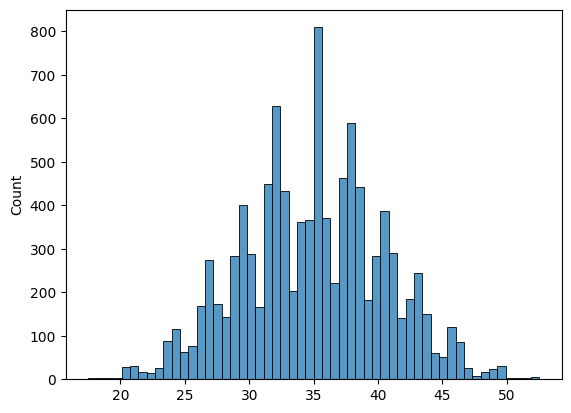

In [ ]:
sns.histplot(bootstrapped_sample_mean_2)

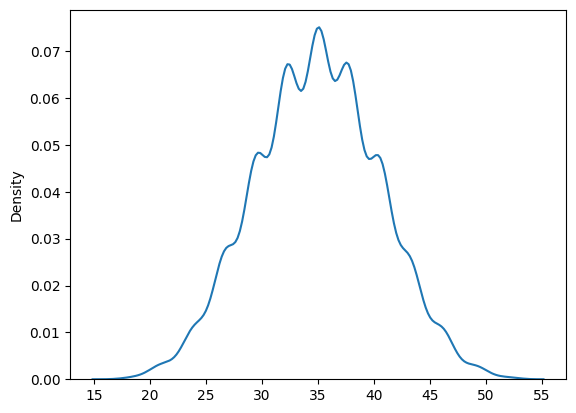

In [ ]:
sns.kdeplot(bootstrapped_sample_mean_2)
plt.show()

In [ ]:
np.percentile(bootstrapped_sample_mean,2.5)

34.0

In [ ]:
np.percentile(bootstrapped_sample_mean,97.5)

36.0

### For Survey 1 --> 95 % CI [34.0,36.0]


In [ ]:
np.percentile(bootstrapped_sample_mean_2,2.5)

24.0

In [ ]:
np.percentile(bootstrapped_sample_mean_2,97.5)

46.0

### For Survey 2 --> 95 % CI [24.0, 46.0]

In [ ]:
df=pd.read_csv("sehwag.csv")
df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,15,21,15,2,0,100.00,2,caught,1,NaN,v Sri Lanka,Hambantota,24 Jul 2012,ODI # 3292
241,3,6,6,0,0,50.00,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),28 Jul 2012,ODI # 3293
242,34,46,29,6,0,117.24,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),31 Jul 2012,ODI # 3294
243,4,20,11,1,0,36.36,2,bowled,1,NaN,v Pakistan,Chennai,30 Dec 2012,ODI # 3314


In [ ]:
 df["Runs"].shape

(245,)

In [ ]:
df["Runs"].sample(6).mean()

33.666666666666664

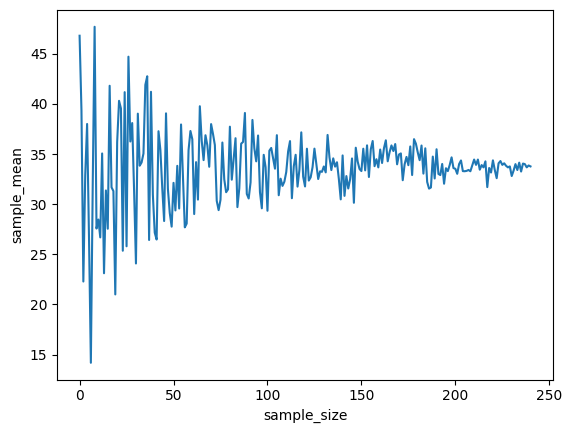

In [ ]:
sample_size_trend=[]
for i in range(5,246):
 sample_mean= df["Runs"].sample(i).mean()
 sample_size_trend.append(sample_mean)
plt.plot(sample_size_trend)
plt.xlabel("sample_size")
plt.ylabel("sample_mean")
plt.show()

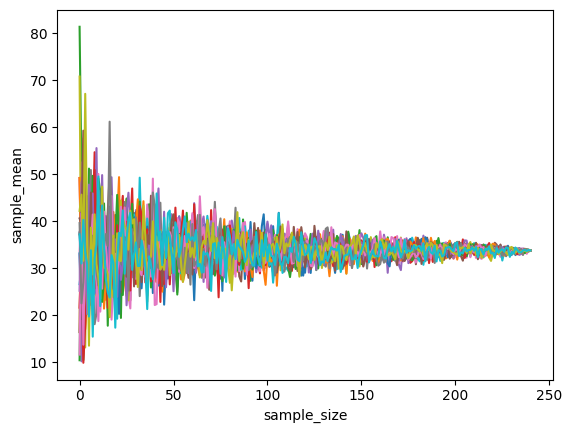

In [ ]:
sample_size_trend=[]
for j in range(20):
  for i in range(5,246):
    sample_mean= df["Runs"].sample(i).mean()
    sample_size_trend.append(sample_mean)
  plt.plot(sample_size_trend)
  sample_size_trend=[]
plt.xlabel("sample_size")
plt.ylabel("sample_mean")
plt.show()

# **BINOMIAL & GEOMETRIC DISTRIBUTION**

## Casino Case Study
### A bag has 3 Red and 2 Blue balls.
### You pick a ball, write its colour, and put it back in the bag. This is done 4 Times in total.
### If all 4 times, the Red balls was drawn, you win Rs 150.
### Otherwise you lose Rs 10.
### Would you play this game?

In [ ]:
# Winning Rs. 150
binom.pmf(n=4,k=4,p=3/5)

0.1296

In [ ]:
# Losing Rs.10
1- binom.pmf(n=4,k=4,p=3/5)

0.8704000000000001

In [ ]:
binom.pmf(n=4,k=0,p=3/5)+binom.pmf(n=4,k=1,p=3/5)+binom.pmf(n=4,k=2,p=3/5)+binom.pmf(n=4,k=3,p=3/5)

0.8704000000000001

In [ ]:
binom.cdf(n=4,k=3,p=3/5)

0.8704000000000001

### **Basics- Taking bernouli Trials**

In [ ]:
# I have a biased coin with P[H]=0.1, P[T]=0.9
# Model Success --> Obtaining Heads
# P[S]=0.1
# P[F]=0.9
# p=0.1
# 1-p = 0.9

In [ ]:
# What is the prob of getting k successes in 1 trial?
n=1
p=0.1
k1,k2=0,1

# P[X=k1]=0.9
# P[X=k2]=0.1

In [ ]:
binom.pmf(n=1,k=0,p=0.1)

0.9

In [ ]:
binom.pmf(n=1,k=1,p=0.1)

0.1

In [ ]:
x=np.arange(0,2)
x

array([0, 1])

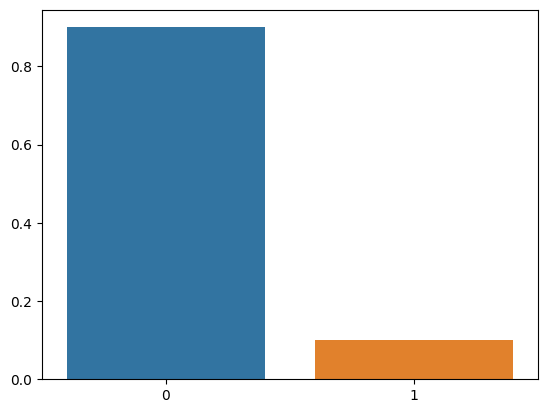

In [ ]:
sns.barplot(x=x,y=binom.pmf(n=1,k=x,p=0.1))
plt.show()

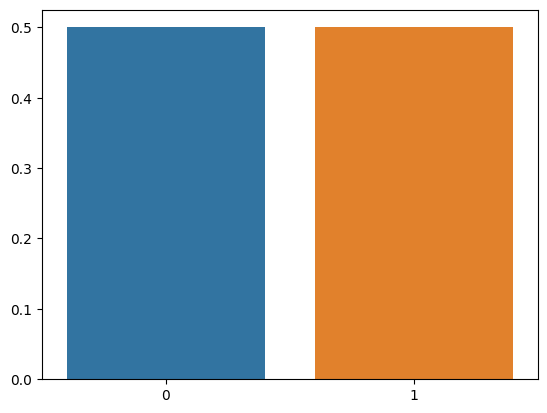

In [ ]:
# making the probability of success as 0.5
sns.barplot(x=x,y=binom.pmf(n=1,k=x,p=0.5))
plt.show()

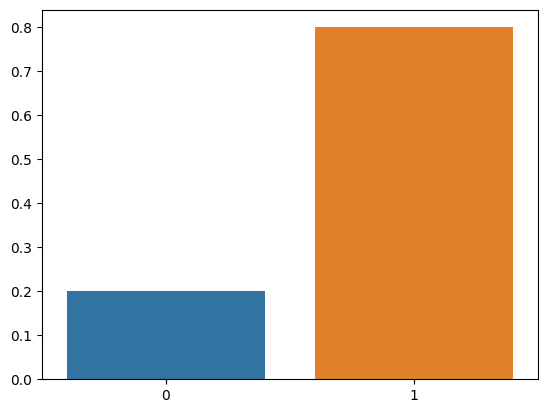

In [ ]:
# making the probability of success as 0.8
sns.barplot(x=x,y=binom.pmf(n=1,k=x,p=0.8))
plt.show()

## TRIAL # 2

In [ ]:
# I have a biased coin with P[H]=0.1, P[T]=0.9
# Model Success --> Obtaining Heads
# P[S]=0.1
# P[F]=0.9
# p=0.1
# 1-p = 0.9

In [ ]:
# What is the prob of getting k successes in 2 trial?
n=2
p=0.1
k1=0
k2=1
k3=2

In [ ]:
# P[X=0]
print((1-p)*(1-p))
print(binom.pmf(n=2,k=0,p=0.1))

0.81
0.81


In [ ]:
# P[X=1]
print((p*(1-p))+(p*(1-p)))
print(binom.pmf(n=2,k=1,p=0.1))

0.18000000000000002
0.18000000000000005


In [ ]:
# P[X=2]
print(p*p)
print(binom.pmf(n=2,k=2,p=0.1))

0.010000000000000002
0.010000000000000002


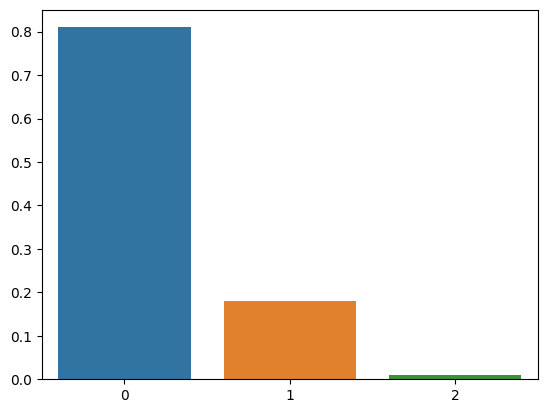

In [ ]:
x=np.arange(0,3)
sns.barplot(x=x,y=binom.pmf(n=2,k=x,p=0.1))
plt.show()

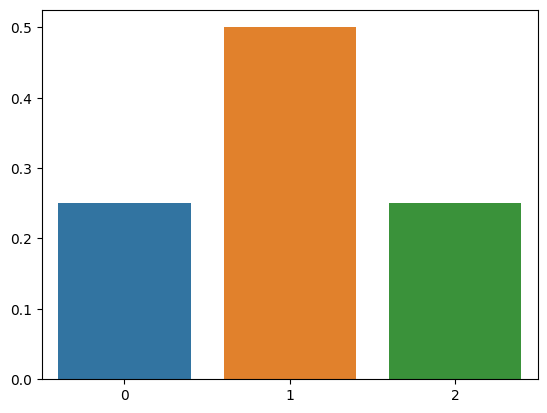

In [ ]:
sns.barplot(x=x,y=binom.pmf(n=2,k=x,p=0.5))
plt.show()

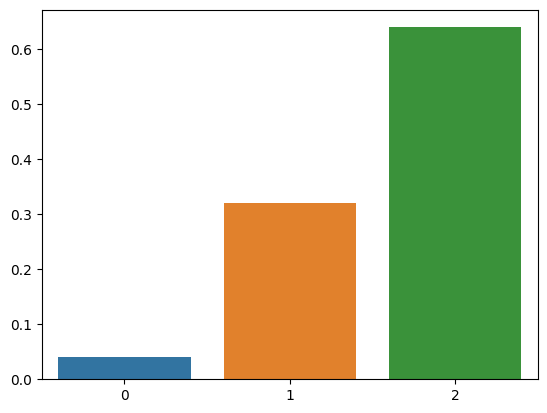

In [ ]:
sns.barplot(x=x,y=binom.pmf(n=2,k=x,p=0.8))
plt.show()

## TRIAL #3

In [ ]:
# I have a biased coin with P[H]=0.1, P[T]=0.9
# Model Success --> Obtaining Heads
# P[S]=0.1
# P[F]=0.9
# p=0.1
# 1-p = 0.9

In [ ]:
# What is the prob of getting k successes in 2 trial?
n=3
p=0.1
k1=0
k2=1
k3=2
k4=3

In [ ]:
p=0.1
# P[X=0]
print((1-p)*(1-p)*(1-p))
print((math.comb(3,0))*(1-p)**3)
print(binom.pmf(n=3,k=0,p=0.1))

0.7290000000000001
0.7290000000000001
0.7290000000000001


In [ ]:
# P[X=1]
print(((1-p)*(1-p)*p)+((1-p)*(1-p)*p)+((1-p)*(1-p)*p))
print((math.comb(3,1))*(p**1)*((1-p)**2))
print(binom.pmf(n=3,k=1,p=0.1))

0.24300000000000005
0.24300000000000005
0.243


In [ ]:
# P[X=2]
print(((p)*(1-p)*p)+((1-p)*p*p)+((1-p)*p*p))
print((math.comb(3,2))*(p**2)*((1-p)**1))
print(binom.pmf(n=3,k=2,p=0.1))

0.027000000000000003
0.027000000000000007
0.027


In [ ]:
# P[X=3]
print(p*p*p)
print((math.comb(3,3))*(p**3)*((1-p)**0))
print(binom.pmf(n=3,k=3,p=0.1))

0.0010000000000000002
0.0010000000000000002
0.0010000000000000002


In [ ]:
print(math.comb(3,0),math.comb(3,1),math.comb(3,2),math.comb(3,3))

1 3 3 1


In [ ]:
# Interview atmost 5 out of 10 ?
binom.pmf(n=10,k=2,p=0.1)

0.19371024450000007

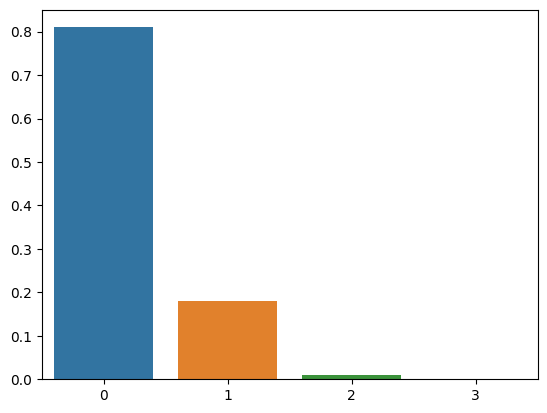

In [ ]:
x=np.arange(0,4)
sns.barplot(x=x,y=binom.pmf(n=2,k=x,p=0.1))
plt.show()

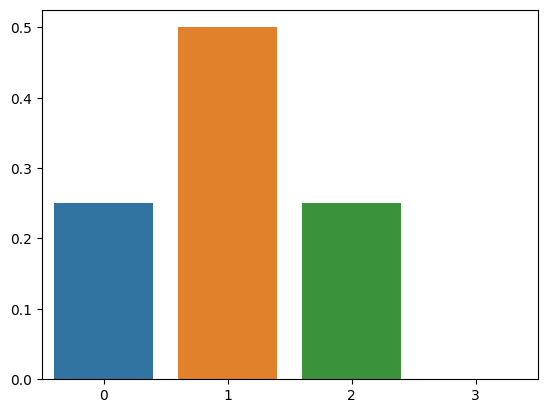

In [ ]:
sns.barplot(x=x,y=binom.pmf(n=2,k=x,p=0.5))
plt.show()

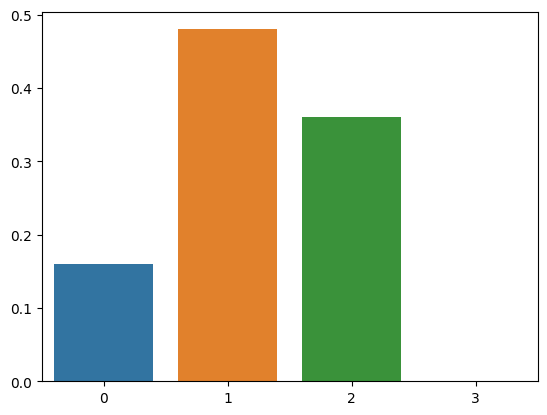

In [ ]:
sns.barplot(x=x,y=binom.pmf(n=2,k=x,p=0.6))
plt.show()

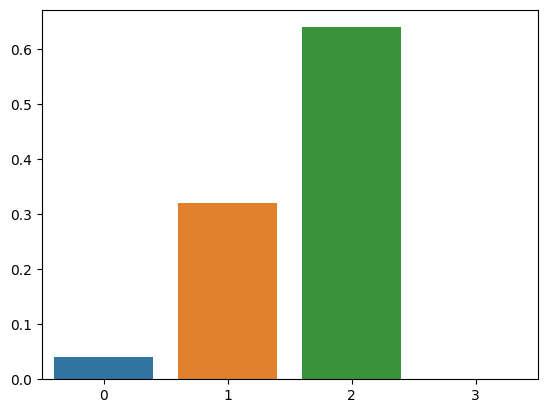

In [ ]:
sns.barplot(x=x,y=binom.pmf(n=2,k=x,p=0.8))
plt.show()

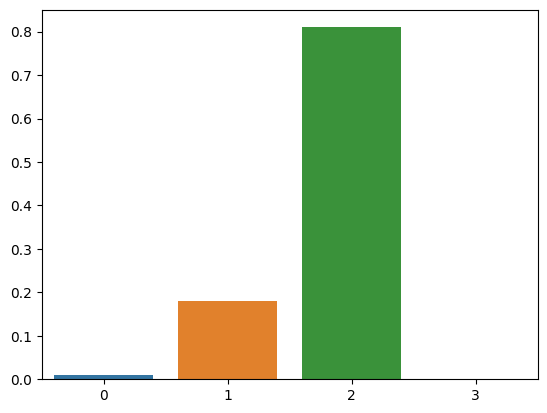

In [ ]:
sns.barplot(x=x,y=binom.pmf(n=2,k=x,p=0.9))
plt.show()

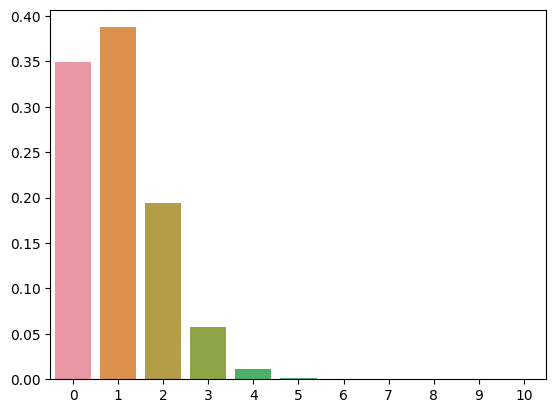

In [ ]:
x=np.arange(0,11)
sns.barplot(x=x,y=binom.pmf(n=10,k=x,p=0.1))
plt.show()

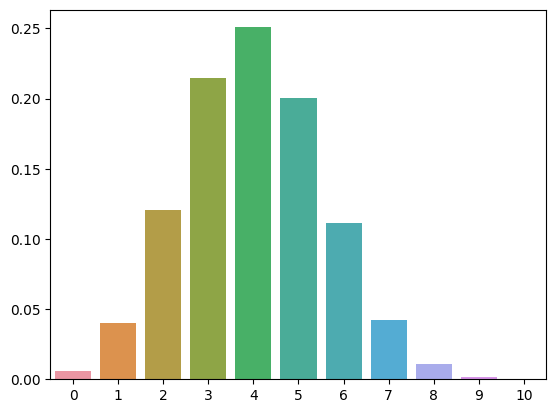

In [ ]:
sns.barplot(x=x,y=binom.pmf(n=10,k=x,p=0.4))
plt.show()

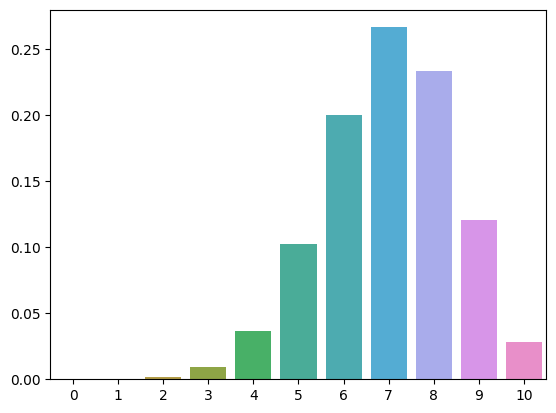

In [ ]:
sns.barplot(x=x,y=binom.pmf(n=10,k=x,p=0.7))
plt.show()

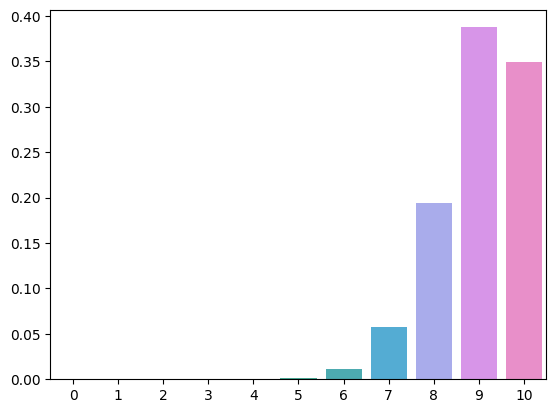

In [ ]:
sns.barplot(x=x,y=binom.pmf(n=10,k=x,p=0.9))
plt.show()

## **GEOMETRIC**

In [ ]:
# What is the prob that he/she will clear the interview in the 3rd trial?
p=0.1
geom.pmf(k=3,p=0.1)

0.08100000000000002

In [ ]:
# What is the prob that he/she will clear the interview within the 3rd trial?
p=0.1
geom.cdf(k=3,p=0.1)

0.271

In [ ]:
geom.pmf(k=1,p=0.1)

0.1

In [ ]:
geom.pmf(k=2,p=0.1)

0.09000000000000001

In [ ]:
geom.pmf(k=3,p=0.1)

0.08100000000000002

In [ ]:
geom.pmf(k=1,p=0.1)+geom.pmf(k=2,p=0.1)+geom.pmf(k=3,p=0.1)

0.271

In [ ]:
binom.pmf(n=10,k=4,p=0.2)

0.0880803839999999

In [ ]:
geom.cdf(k=10,p=0.2)

0.8926258176